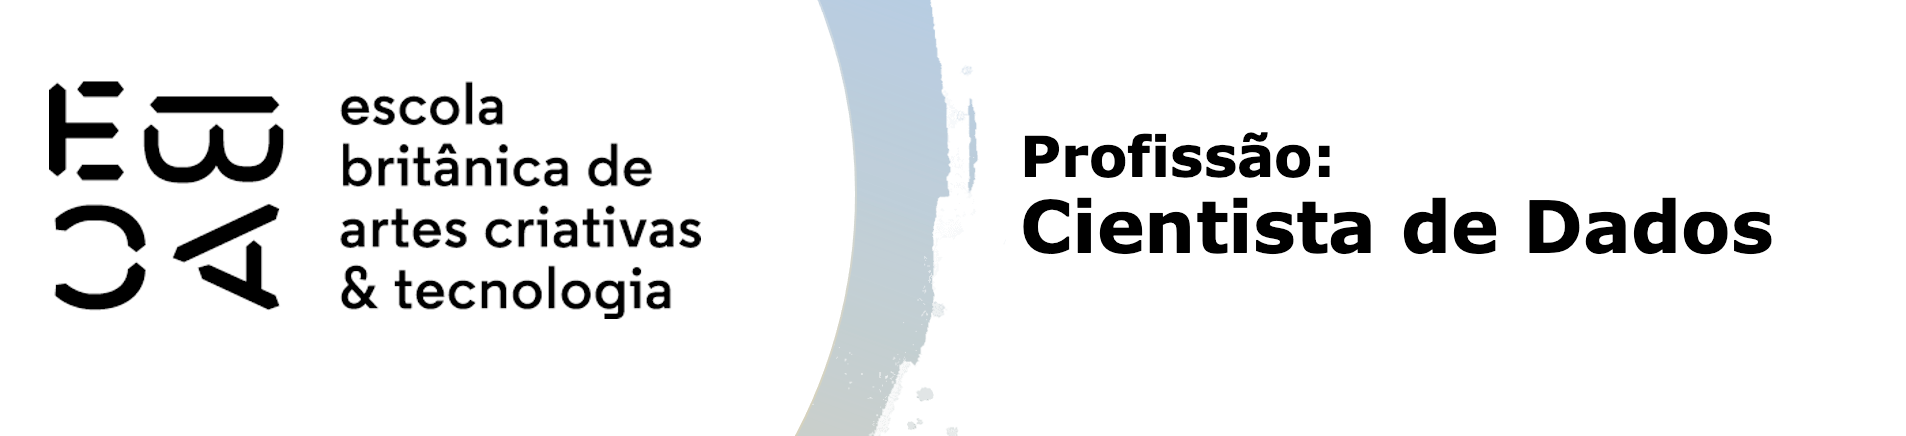

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib notebook

In [6]:
df = pd.read_pickle('base_nfp.pkl')

df_cut = df.set_index('Data Emissão')
df_cut = df_cut['2020-01-01':]
df_cut.reset_index(inplace=True)
df_cut.rename(columns={'Data Emissão':'Data_Emissão'}, inplace=True)
df_cut.head()

,Data_Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [7]:
# Dia da semana
df_cut['Dia_semana'] = df_cut['Data_Emissão'].dt.day_name()

# Dummy para fim de semana
df_cut['Fim_de_semana'] = ((df_cut['Data_Emissão'].dt.dayofweek) // 5 == 1).astype(float)

# Dia do mês
df_cut['Dia_mes'] = df_cut['Data_Emissão'].dt.day

# Mês
df_cut['Mes'] = df_cut['Data_Emissão'].dt.month

# Trimestre
df_cut['Trimestre'] = df_cut['Data_Emissão'].dt.quarter

# Ano
df_cut['Ano'] = df_cut['Data_Emissão'].dt.year

In [8]:
df_cut.head()

,Data_Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,Dia_semana,Fim_de_semana,Dia_mes,Mes,Trimestre
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2020,2,0.0,0,não definido,Wednesday,0.0,1,1,1
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2020,2,0.0,0,Mercado,Wednesday,0.0,1,1,1
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Alimentos,Wednesday,0.0,1,1,1
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Farmácia,Wednesday,0.0,1,1,1
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Restaurantes,Wednesday,0.0,1,1,1


In [9]:
df_cut['Valor_NF_5_cat'] = pd.qcut(x=df_cut['Valor NF'], q=5)
df_cut['Valor_NF_10_cat'] = pd.qcut(x=df_cut['Valor NF'], q=10)
df_cut['Valor_NF_20_cat'] = pd.qcut(x=df_cut['Valor NF'], q=20)
df_cut['Valor_NF_50_cat'] = pd.qcut(x=df_cut['Valor NF'], q=50)

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [11]:
# Definindo o metadados
df_short = df_cut.drop(columns=['Data_Emissão', 'CNPJ emit.', 'Emitente', 'No.', 'Valor NF', 'Data Registro', 'Créditos', 
                     'Situação do Crédito', 'Retorno'])

metadados = pd.DataFrame({'dtype':df_short.dtypes})
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito','papel'] = 'resposta'
metadados['nunique'] = df_cut.nunique()
metadados

,dtype,papel,nunique
Ano,int32,covariavel,2
Semestre,int64,covariavel,2
flag_credito,int64,resposta,2
categoria,object,covariavel,9
Dia_semana,object,covariavel,7
Fim_de_semana,float64,covariavel,2
Dia_mes,int32,covariavel,31
Mes,int32,covariavel,12
Trimestre,int32,covariavel,4
Valor_NF_5_cat,category,covariavel,5


In [12]:
# Definindo  função
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [13]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'nunique']>50):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df_short[var],5,duplicates='drop'), df_short.flag_credito)
    else: 
        metadados.loc[var, 'IV'] = IV(df_short[var], df_short.flag_credito)
    
metadados

,dtype,papel,nunique,IV
Ano,int32,covariavel,2,0.003195
Semestre,int64,covariavel,2,0.004874
flag_credito,int64,resposta,2,NaN
categoria,object,covariavel,9,0.278826
Dia_semana,object,covariavel,7,0.005878
Fim_de_semana,float64,covariavel,2,0.004599
Dia_mes,int32,covariavel,31,0.015128
Mes,int32,covariavel,12,0.009098
Trimestre,int32,covariavel,4,0.003554
Valor_NF_5_cat,category,covariavel,5,0.038990


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

- A variavel **categoria** possui maior poder de discriminação.
- As variaveis categoriazadas parecem ter discriminar pouco.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [14]:
# Agrupando, contando dados e criando uma nova coluna com a soma dos valores em cada linha.
df_cut_2 = df_cut.groupby(['Trimestre', 'flag_credito']).size().unstack(fill_value=0)
df_cut_2['soma'] = df_cut_2.sum(axis=1)
df_cut_2

flag_credito,0,1,soma
Trimestre,,,
1,11521,9146,20667
2,12167,8231,20398
3,12618,9720,22338
4,13332,10221,23553


<IPython.core.display.Javascript object>


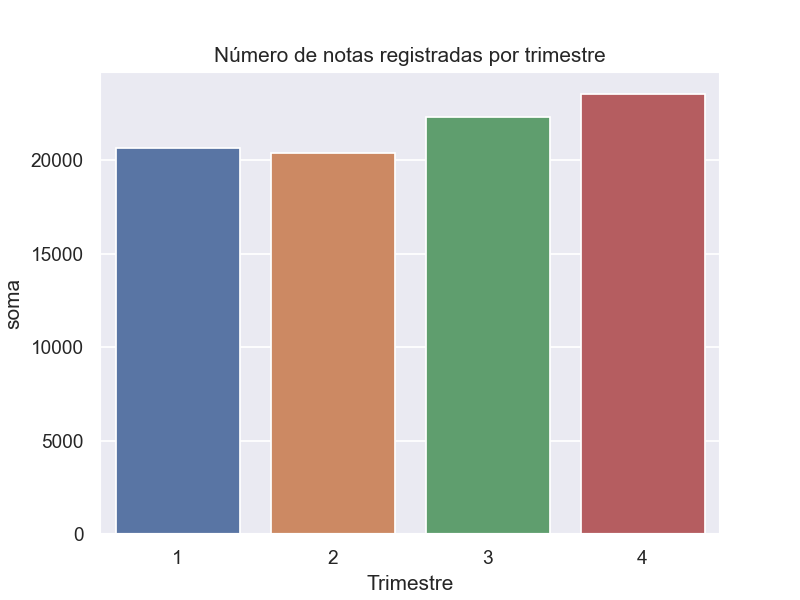

In [15]:
# A quantidade de notas registradas na base por período
fig, ax = plt.subplots()
sns.barplot(data=df_cut_2.reset_index(), x='Trimestre', y='soma', errcolor='gray', ax=ax)
ax.set(title='Número de notas registradas por trimestre')
plt.show()

In [16]:
# Agrupando, contando dados e criando uma nova coluna com a soma dos valores e proporção entre o número de ocorrências.
df_cut_3 = df_cut.groupby(['Trimestre', 'categoria', 'flag_credito']).size().unstack(fill_value=0)
df_cut_3['soma'] = df_cut_3.sum(axis=1)
df_cut_3['tx_evento'] = df_cut_3[1]/df_cut_3[0]
df_cut_3.head()

flag_credito             0     1  soma  tx_evento
Trimestre categoria                              
1         Alimentos    374   908  1282   2.427807
          Auto posto   118    34   152   0.288136
          Construção  2043  1811  3854   0.886442
          Farmácia    1794   638  2432   0.355630
          Mercado     3456  3271  6727   0.946470

<IPython.core.display.Javascript object>


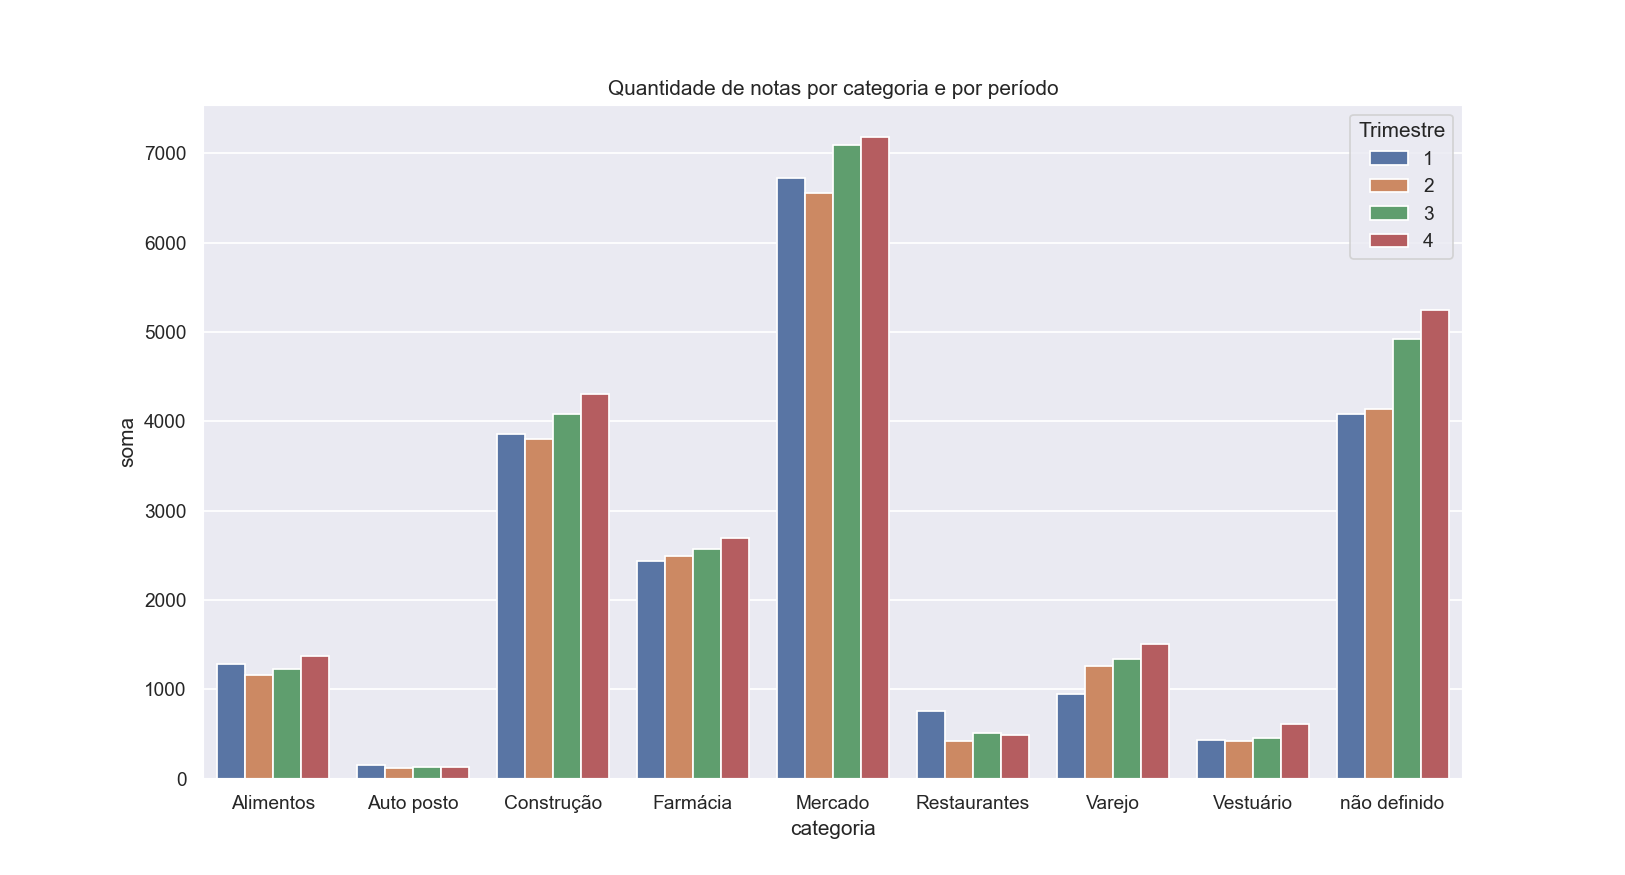

Text(0.5, 1.0, 'Quantidade de notas por categoria e por período')

In [17]:
# A quantidade de notas por categoria e por período
fig, ax = plt.subplots(figsize=(13,7))

sns.barplot(data=df_cut_3.reset_index(), x='categoria', y='soma', hue='Trimestre', errorbar=None, ax=ax)
ax.set_title('Quantidade de notas por categoria e por período')

<IPython.core.display.Javascript object>


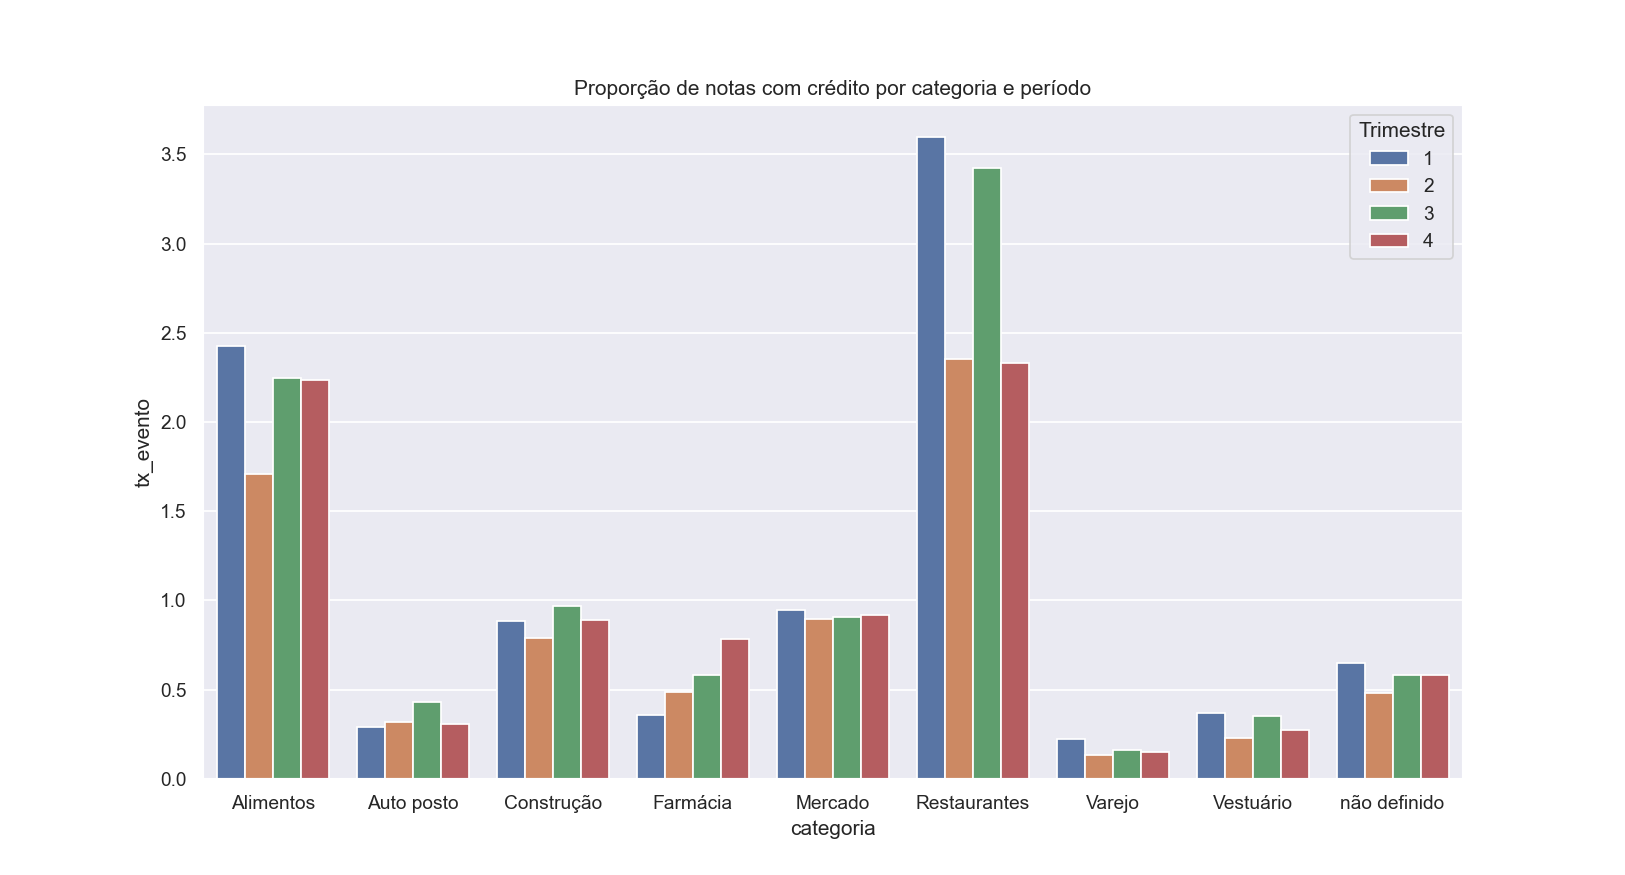

[Text(0.5, 1.0, 'Proporção de notas com crédito por categoria e período')]

In [18]:
# A proporção de notas com crédito por categoria por período
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=df_cut_3.reset_index(), x='categoria', y='tx_evento', hue='Trimestre', errcolor='black', errwidth=1, ax=ax)
ax.set(title='Proporção de notas com crédito por categoria e período')

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [19]:
df_cut_3['pct_evento']     = df_cut_3[1]/df_cut_3[1].groupby(level=0).sum()
df_cut_3['pct_nao_evento'] = df_cut_3[0]/df_cut_3[0].groupby(level=0).sum()
df_cut_3['WOE'] = np.log(df_cut_3.pct_evento/df_cut_3.pct_nao_evento)
df_cut_3.head()

flag_credito             0     1  soma  tx_evento  pct_evento  pct_nao_evento  \
Trimestre categoria                                                             
1         Alimentos    374   908  1282   2.427807    0.099278        0.032462   
          Auto posto   118    34   152   0.288136    0.003717        0.010242   
          Construção  2043  1811  3854   0.886442    0.198010        0.177328   
          Farmácia    1794   638  2432   0.355630    0.069757        0.155716   
          Mercado     3456  3271  6727   0.946470    0.357643        0.299974   

flag_credito               WOE  
Trimestre categoria             
1         Alimentos   1.117843  
          Auto posto -1.013469  
          Construção  0.110315  
          Farmácia   -0.803010  
          Mercado     0.175839

<IPython.core.display.Javascript object>


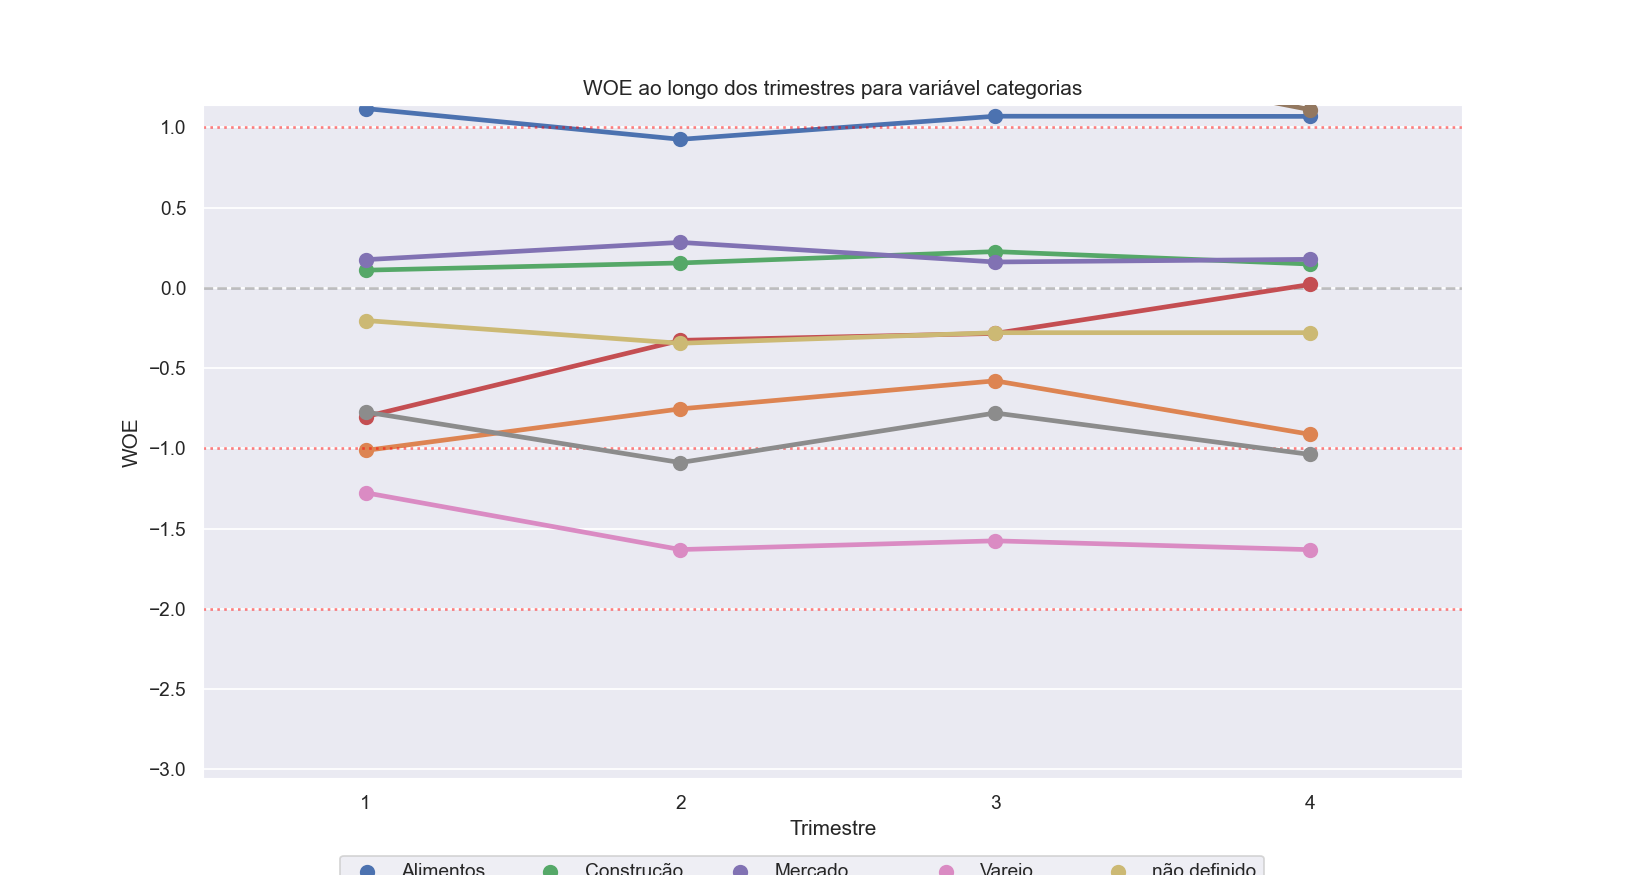

In [20]:
fig, ax = plt.subplots(figsize=(13,7))

# Comando principal do gráfico
sns.pointplot(data=df_cut_3.reset_index(), y = 'WOE', x = 'Trimestre', hue='categoria', ax=ax);

#limites do gráfico - mostrando 1 e -1 para ter referência
ymax = max(2.1, max(df_cut_3.WOE))
ymin = min(-2.1, min(df_cut_3.WOE))
ax.set_ylim([ymin, ymax])

# Linhas de referência
ax.axhline(2, linestyle=':'  , color='red', alpha=.5)
ax.axhline(1, linestyle=':'  , color='red', alpha=.5)
ax.axhline(0, linestyle='--' , color='grey', alpha=.5)
ax.axhline(-1, linestyle=':' , color='red', alpha=.5)
ax.axhline(-2, linestyle=':' , color='red', alpha=.5)

ax.set_title(f'WOE ao longo dos trimestres para variável categorias')

ax.legend(bbox_to_anchor=(.85, -.1), ncol=5)

In [21]:
def plot_iv(IV):
    fig, ax = plt.subplots()
    x = IV.index
    a = [.02]*len(IV.index)
    b = [.1]*len(IV.index)
    c = [.3]*len(IV.index)
    d = [.5]*len(IV.index)
    e = [.6]*len(IV.index)

    ax.fill_between(IV.index, a, color='grey', alpha=.2)
    ax.fill_between(IV.index, a, b, color='orange', alpha=.1)
    ax.fill_between(IV.index, b, c, color='green', alpha=.1)
    ax.fill_between(IV.index, c, d, color='blue', alpha=.1)
    ax.fill_between(IV.index, d, e, color='purple', alpha=.1)
    ax.plot(IV)

    ax.set_title("Information Value de categoria ao longo dos Trimestres")
    ax.set_ylabel("Information Value")
    ax.set_xlabel("Trimestres")

<IPython.core.display.Javascript object>


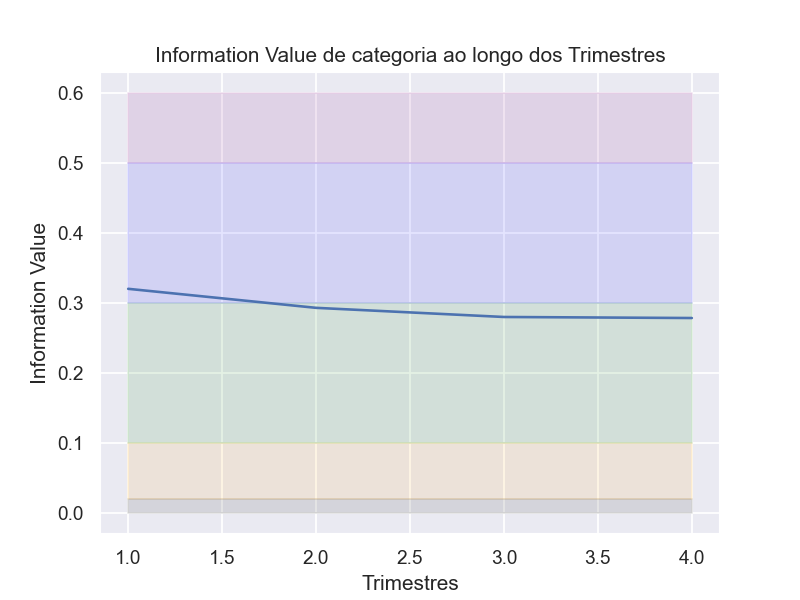

In [22]:
plot_iv(((df_cut_3.pct_evento - df_cut_3.pct_nao_evento)*df_cut_3.WOE).groupby(level=0).sum())

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

## Conclusão
- Restaurantes é a categoria com maior proporção.
- As diferenças não parecem estáveis.
- Restaurantes oscila entre alto e baixo a cada trimestre.
- Farmácia apresentou aumento constante no WOE ao longo do tempo.